### Time to get your hands dirty! Cloning quasars

Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)

![](https://classic.sdss.org/includes/sideimages/sdss_pie2.jpg)

Download the SDSS quasara data

In [18]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:

In [19]:
import astropy
astropy.cosmology.Planck15

FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486)

-----

## My implementation

In [20]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from astroML.density_estimation import EmpiricalDistribution
import astropy

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15

just give a quick look to data

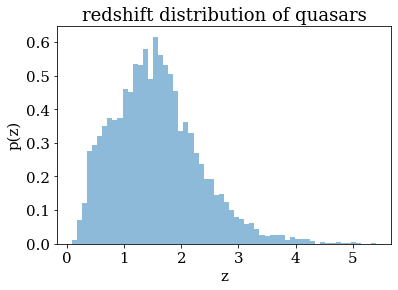

In [21]:
plt.hist(z, bins=60, density=True, alpha=0.5, label='dataset');
plt.title('redshift distribution of quasars')
plt.xlabel('z')
plt.ylabel('p(z)');

In [22]:
N=100000 
counts, bins= np.histogram(z, bins=50, density=True)

### Cloning data with rejection sampling

In [23]:
# generate the distribution h(x) given the histogram we have
h = scipy.stats.rv_histogram((counts,bins))  

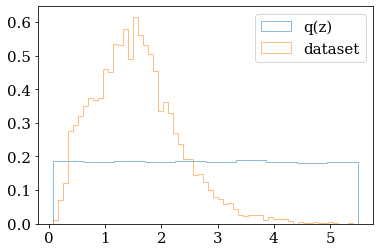

In [24]:
#choose a proposal distribution q(x) that covers h(x) and draw N xi from q(x) 
qx = scipy.stats.uniform(min(z),max(z))
xi = qx.rvs(N)
#xi = np.random.uniform(0, 6, N)

#check if it's right
plt.hist(xi, alpha=0.5, density=True, histtype='step', label='q(z)')   
plt.hist(z, bins=60, density=True, alpha=0.5, label='dataset',histtype='step')
plt.legend();

In [25]:
# generate random samples from U(0, a), with a >= maxh
max_h = max(counts)                                 
u1 = np.random.uniform(0, max_h, N)

# take only the random samples under h(xi)
mask = u1 <= h.pdf(xi)
rcloned = xi[mask] 

### Cloning data with inverse transform

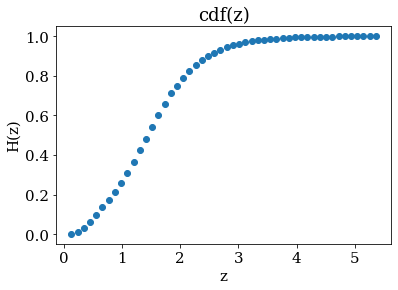

In [26]:
# take the cdf of the histogram H(x)
histogram_frac = counts/sum(counts)               
H = np.cumsum(histogram_frac) 

#check
bin_mid_loc = (bins[1:]+bins[:-1])/2
plt.scatter(bin_mid_loc, H)
plt.ylabel('H(z)')
plt.xlabel('z')
plt.title('cdf(z)');

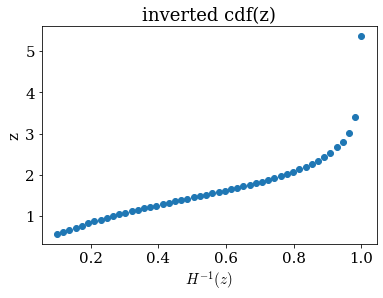

In [27]:
# take the inverse of the cdf
H_inv = scipy.interpolate.interp1d(H, bin_mid_loc)   #returns a function that has H as x, bin_mid_Loc as y

# check if H_inv ok
xgrid = np.linspace(0.1, 1, 50)
plt.scatter(xgrid, H_inv(xgrid)) 
plt.ylabel('z')
plt.xlabel(r'$H^{-1}(z)$')
plt.title('inverted cdf(z)');

In [28]:
# generate random sample from U(0,1) and plug it in H^-1
u2 = np.random.uniform(0.01 , 1, N)                 
itcloned = H_inv(u2)

### Compare cloned data and real data

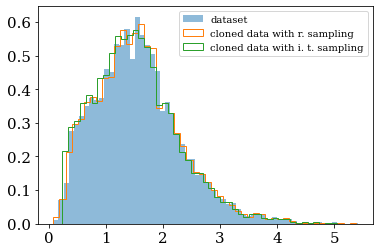

In [29]:
# visual comparison
plt.hist(z, bins=60, density=True, alpha=0.5, label='dataset');
plt.hist(rcloned, bins=50, histtype='step', density=True, label='cloned data with r. sampling')
plt.hist(itcloned, bins=50, histtype='step', density=True, label='cloned data with i. t. sampling')
plt.legend(fontsize=10);

In [30]:
#KS distance
rKS = scipy.stats.ks_2samp(z, rcloned)
itKS = scipy.stats.ks_2samp(z, itcloned)
print('data cloned with REJECTION sampling: ks_distance = ' + str(rKS[0]))
print('data cloned with INVERSE TRANSFORM sampling: ks_distance = ' + str(itKS[0]))

data cloned with REJECTION sampling: ks_distance = 0.009550469824052499
data cloned with INVERSE TRANSFORM sampling: ks_distance = 0.031399999999999983


### Theoretical distribution of quasars in cosmology

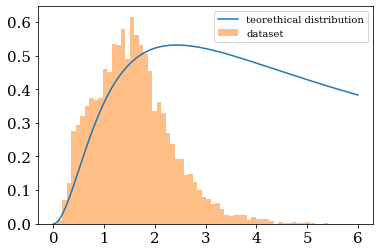

In [31]:
def quasar_distribution(z):
    return 4 * np.pi * astropy.cosmology.Planck15.differential_comoving_volume(z)

z_values = np.linspace(0,6, 1000)
plt.plot(z_values, 10e-13 * quasar_distribution(z_values), label='teorethical distribution')
plt.hist(z, bins=60, density=True, alpha=0.5, label='dataset');
plt.legend(fontsize=10)

### Other variables

In [39]:
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

data

array([(b'000006.53+0030', 2.72280000e-02,  0.515341, 1.8246, 20.384, 0.065, 20.461, 0.034, 20.324, 0.038, 20.093, 0.041, 20.042, 0.121,  0.   , 0.   , 0., 0., 0., 0., 193034571183292416),
       (b'000008.13+0016', 3.39000000e-02,  0.276301, 1.8373, 20.242, 0.054, 20.206, 0.024, 19.941, 0.032, 19.485, 0.032, 19.178, 0.068, 17.351, 0.291, 0., 0., 0., 0., 193034571195875328),
       (b'000009.26+1517', 3.86040000e-02, 15.298477, 1.1985, 19.916, 0.042, 19.807, 0.036, 19.374, 0.017, 19.148, 0.023, 19.312, 0.069,  0.   , 0.   , 0., 0., 0., 0., 211612125330669568),
       ...,
       (b'073536.64+3132', 1.13902706e+02, 31.54912 , 1.7592, 20.225, 0.043, 20.038, 0.021, 19.973, 0.021, 19.73 , 0.024, 19.634, 0.067,  0.   , 0.   , 0., 0., 0., 0., 152501125474418688),
       (b'073539.11+4119', 1.13912999e+02, 41.321803, 1.4597, 19.494, 0.031, 19.394, 0.016, 19.21 , 0.019, 19.098, 0.022, 19.112, 0.051,  0.   , 0.   , 0., 0., 0., 0., 488305391474573312),
       (b'073542.46+3000', 1.13926924e+02, 

In [93]:
N = 1000
colors = np.empty((len(data[:N]), 5))
colors[:, 0] = data[:N]['mag_u'] - data[:N]['mag_g']
colors[:, 1] = data[:N]['mag_g'] - data[:N]['mag_r']
colors[:, 2] = data[:N]['mag_r'] - data[:N]['mag_i']
colors[:, 3] = data[:N]['mag_i'] - data[:N]['mag_z']
colors[:, 4] = data[:N]['mag_z'] - data[:N]['mag_J']

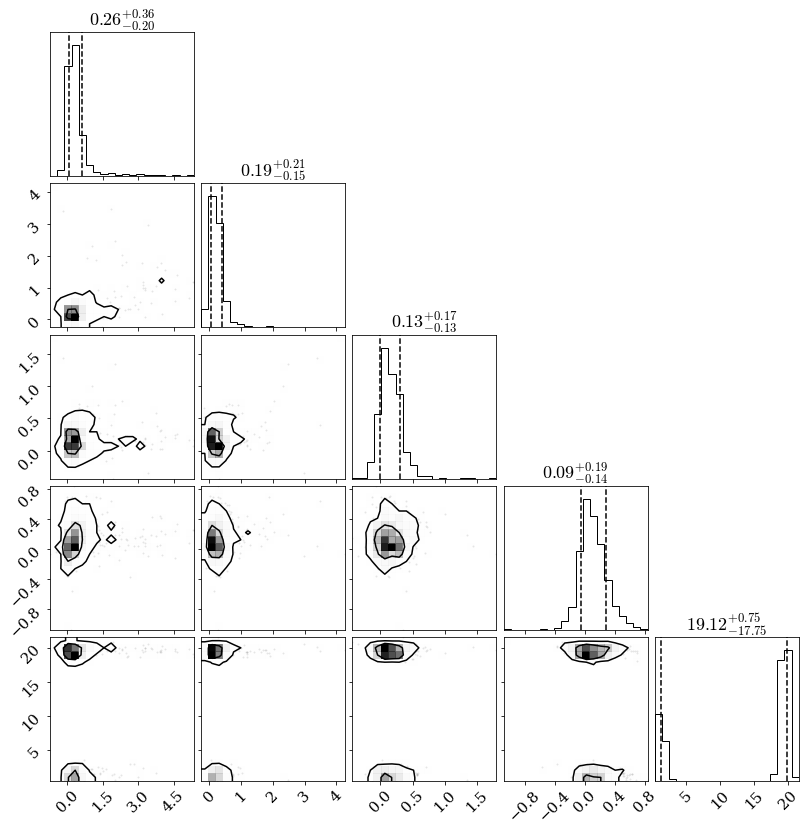

In [67]:
import corner

# 68 and 95 credible levels, 0.16 and 0.84 quantiles (so that area inside is 0.68)
figure = corner.corner(colors, levels = [0.68, 0.95], quantiles=[0.16, 0.84],
                       show_titles=True)

There are two populations in the z-J color!
Let's take all data, use dimensionality reduction and then classify the two populations

#### t-SNE + kMeans

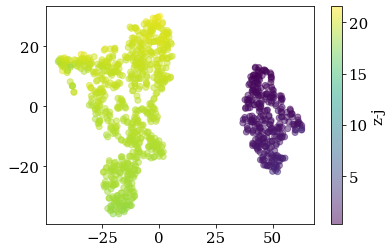

In [94]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,learning_rate=100)
reduced = tsne.fit_transform(colors)

plt.scatter(reduced[:,0], reduced[:,1], alpha=0.5, c=colors[:,4])
plt.colorbar(label='z-j')

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


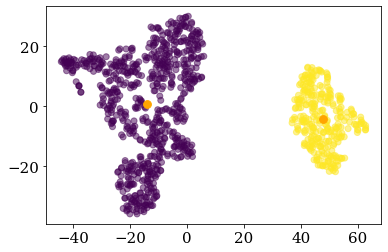

In [95]:
from sklearn.cluster import KMeans

n_comps = 2
clf = KMeans(n_clusters=n_comps)
clf.fit(reduced)
centers = clf.cluster_centers_ 
labels = clf.predict(reduced)

plt.scatter(reduced[:,0], reduced[:,1], alpha=0.5, c=labels)
plt.scatter(centers[0][0], centers[0][1], color='orange', s=60)
plt.scatter(centers[1][0], centers[1][1], color='orange', s=60)

#### PCA + kMeans

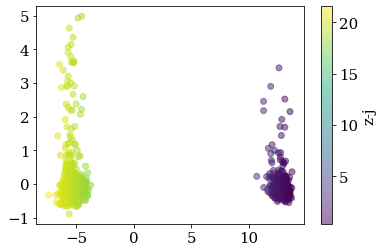

In [96]:
n_components = 2
pca = PCA(n_components=n_components)   
reduced = pca.fit_transform(colors)

plt.scatter(reduced[:,0], reduced[:,1], alpha=0.5, c=colors[:,4])
plt.colorbar(label='z-j')

/usr/local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


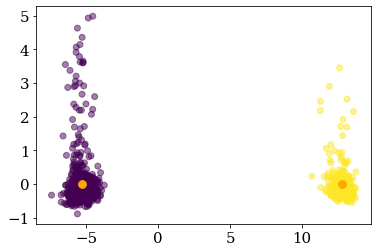

In [97]:
from sklearn.cluster import KMeans

n_comps = 2
clf = KMeans(n_clusters=n_comps)
clf.fit(reduced)
centers = clf.cluster_centers_ 
labels = clf.predict(reduced)

plt.scatter(reduced[:,0], reduced[:,1], alpha=0.5, c=labels)
plt.scatter(centers[0][0], centers[0][1], color='orange', s=60)
plt.scatter(centers[1][0], centers[1][1], color='orange', s=60)